<a href="https://colab.research.google.com/github/URK21CO2018/Federated-Learning-Based-Black-Hole-Prevention-in-the-Internet-of-Things-Environment/blob/main/horizontal_and_vertical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/blackhole.csv')  # Replace with your actual dataset path or use provided data snippet
data

,time,source,destination,length,info,transmission_rate_per_1000_ms,reception_rate_per_1000_ms,transmission_average_per_sec,reception_average_per_sec,transmission_count_per_sec,reception_count_per_sec,transmission_total_duration_per_sec,reception_total_duration_per_sec,dao,dis,dio,category,label
0,0.037,39,9999,0.000000,1.0,0.000000,0.671176,0.000000,0.499879,0.000000,0.671176,0.539313,0.570032,0.000000,0.0,0.000000,Normal,0
1,0.037,39,9999,0.000000,1.0,0.000000,0.649873,0.000000,0.505234,0.000000,0.649873,0.264704,0.530547,0.000000,0.0,0.000000,Normal,0
2,0.038,39,9999,0.000000,1.0,0.671176,0.652361,0.462516,0.501327,0.671768,0.652361,0.546376,1.000000,0.000000,0.0,0.690115,Blackhole,1
3,0.045,39,9999,0.000000,1.0,0.000000,0.633786,0.000000,0.517346,0.000000,0.634105,0.585425,0.553276,0.000000,0.0,0.000000,Normal,0
4,0.046,39,9999,0.000000,1.0,0.000000,0.630378,0.000000,0.538789,0.000000,0.630378,0.443171,0.615377,0.000000,0.0,0.000000,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404129,2613.554,17,15,0.485467,0.0,0.469580,0.476234,0.717022,0.637038,0.469960,0.475985,0.682992,0.535797,0.507488,0.0,0.000000,Blackhole,1
404130,2616.334,64,83,0.485467,0.0,0.469580,0.476234,1.000000,0.665590,0.469960,0.475985,1.000000,0.563732,0.507488,0.0,0.000000,Blackhole,1
404131,2638.755,18,93,0.485467,0.0,0.469580,0.476234,0.769910,0.650359,0.469960,0.475985,0.720219,0.538528,0.507488,0.0,0.000000,Blackhole,1
404132,2654.776,17,15,0.485467,0.0,0.469580,0.476234,0.717022,0.637038,0.469960,0.475985,0.682992,0.535797,0.507488,0.0,0.000000,Blackhole,1


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/blackhole.csv')

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Option 1: Oversampling the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Option 2: Undersampling the majority class
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

# Check the distribution of the label after resampling
print(df_resampled['label'].value_counts())

# Save the balanced dataset to a new CSV file
df_resampled.to_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv', index=False)


label
0    269852
1    269852
Name: count, dtype: int64


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')
data1

,time,source,destination,length,info,transmission_rate_per_1000_ms,reception_rate_per_1000_ms,transmission_average_per_sec,reception_average_per_sec,transmission_count_per_sec,reception_count_per_sec,transmission_total_duration_per_sec,reception_total_duration_per_sec,dao,dis,dio,category,label
0,0.037,39,9999,0.000000,1.000000,0.000000,0.671176,0.000000,0.499879,0.000000,0.671176,0.539313,0.570032,0.0,0.0,0.000000,Normal,0
1,0.037,39,9999,0.000000,1.000000,0.000000,0.649873,0.000000,0.505234,0.000000,0.649873,0.264704,0.530547,0.0,0.0,0.000000,Normal,0
2,0.038,39,9999,0.000000,1.000000,0.671176,0.652361,0.462516,0.501327,0.671768,0.652361,0.546376,1.000000,0.0,0.0,0.690115,Blackhole,1
3,0.045,39,9999,0.000000,1.000000,0.000000,0.633786,0.000000,0.517346,0.000000,0.634105,0.585425,0.553276,0.0,0.0,0.000000,Normal,0
4,0.046,39,9999,0.000000,1.000000,0.000000,0.630378,0.000000,0.538789,0.000000,0.630378,0.443171,0.615377,0.0,0.0,0.000000,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539699,555.847,91,2,0.485467,0.000000,0.469580,0.606685,0.554688,0.492306,0.469960,0.607132,0.435817,0.496621,0.0,0.0,0.000000,Blackhole,1
539700,435.772,93,15,0.485467,0.000000,0.520668,0.000000,0.535023,0.000000,0.520915,0.000000,0.498552,0.535797,0.0,0.0,0.000000,Blackhole,1
539701,530.338,69,96,0.485467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.554547,0.412039,0.0,0.0,0.000000,Blackhole,1
539702,170.155,50,73,0.485955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352126,0.580352,0.0,0.0,0.000000,Blackhole,1


#  Use the Resampled Dataset

In [ ]:
pip install numpy pandas scikit-learn matplotlib


# **Base random forest using machine learning**

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     54114
           1       0.91      0.88      0.90     53827

    accuracy                           0.90    107941
   macro avg       0.90      0.90      0.90    107941
weighted avg       0.90      0.90      0.90    107941



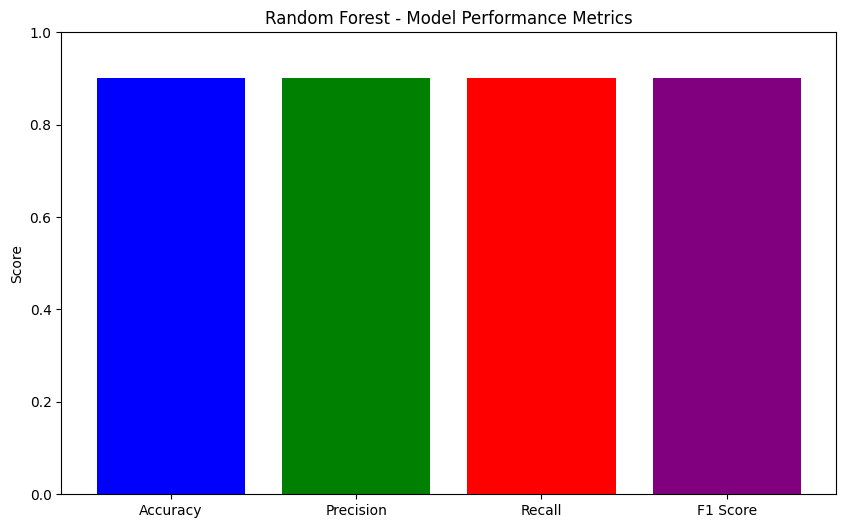

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Define the features (X) and the target variable (y)
X = data1.drop(columns=['label', 'category'])  # Drop the label and category columns
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=26, max_depth=5, min_samples_split=20, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Random Forest - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


# **horizontal federated learning**

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     54114
           1       0.91      0.91      0.91     53827

    accuracy                           0.91    107941
   macro avg       0.91      0.91      0.91    107941
weighted avg       0.91      0.91      0.91    107941



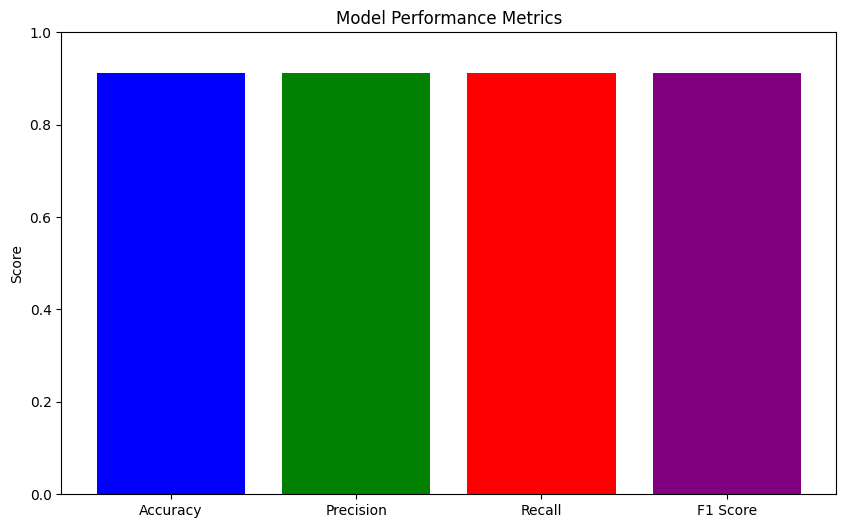

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv') # Replace with the actual path to your dataset

# Define the features (X) and the target variable (y)
X = data1.drop(columns=['label', 'category'])  # Drop the label and category columns
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate horizontal federated learning
# Here we'll split the training data between two 'clients'
X_train_client1, X_train_client2, y_train_client1, y_train_client2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Reduce the model performance by adjusting hyperparameters
rf_client1 = RandomForestClassifier(n_estimators=30, max_depth=6, min_samples_split=23, random_state=42)
rf_client1.fit(X_train_client1, y_train_client1)

rf_client2 = RandomForestClassifier(n_estimators=30, max_depth=6, min_samples_split=23, random_state=42)
rf_client2.fit(X_train_client2, y_train_client2)

# Aggregate the models (this is a simple approach - averaging predictions)
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)

# Average the probabilities
y_pred_proba_avg = (y_pred_client1 + y_pred_client2) / 2

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()


# **vertical federated learning**

*   List item

*   List item
*   List item


*   List item



In [ ]:
# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Drop non-numeric columns and target variables
X = data1.drop(columns=['label', 'category'])

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check for and handle missing values (if any)
X.fillna(0, inplace=True)

# Split the features between two 'clients'
X_client1 = X.iloc[:, :9]  # First 9 features for Client 1
X_client2 = X.iloc[:, 9:]  # Remaining features for Client 2

# Get the column names for Client 1 and Client 2
client1_features = X.columns[:9]  # Columns used in Client 1
client2_features = X.columns[9:]  # Columns used in Client 2

# Display the feature columns for each client
print("Client 1 Feature Columns:\n", client1_features)
print("Client 2 Feature Columns:\n", client2_features)


Client 1 Feature Columns:
 Index(['time', 'source', 'destination', 'length', 'info',
       'transmission_rate_per_1000_ms', 'reception_rate_per_1000_ms',
       'transmission_average_per_sec', 'reception_average_per_sec'],
      dtype='object')
Client 2 Feature Columns:
 Index(['transmission_count_per_sec', 'reception_count_per_sec',
       'transmission_total_duration_per_sec',
       'reception_total_duration_per_sec', 'dao', 'dis', 'dio'],
      dtype='object')


In [ ]:
# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Drop non-numeric columns and target variables
X = data1.drop(columns=['label', 'category'])

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check for and handle missing values (if any)
X.fillna(0, inplace=True)

# Split the features between two 'clients'
X_client1 = X.iloc[:, :9]  # First 9 features for Client 1
X_client2 = X.iloc[:, 9:]  # Remaining features for Client 2

# Select one target feature from each client
client1_target_feature = X_client1.iloc[:, 0]  # First feature from Client 1
client2_target_feature = X_client2.iloc[:, 0]  # First feature from Client 2

# Display the target feature column names
print("Client 1 Targeted Feature Column Name:\n", X_client1.columns[0])
print("Client 2 Targeted Feature Column Name:\n", X_client2.columns[0])


Client 1 Targeted Feature Column Name:
 time
Client 2 Targeted Feature Column Name:
 transmission_count_per_sec


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     54114
           1       0.93      0.91      0.92     53827

    accuracy                           0.92    107941
   macro avg       0.92      0.92      0.92    107941
weighted avg       0.92      0.92      0.92    107941



Text(0, 0.5, 'Score')

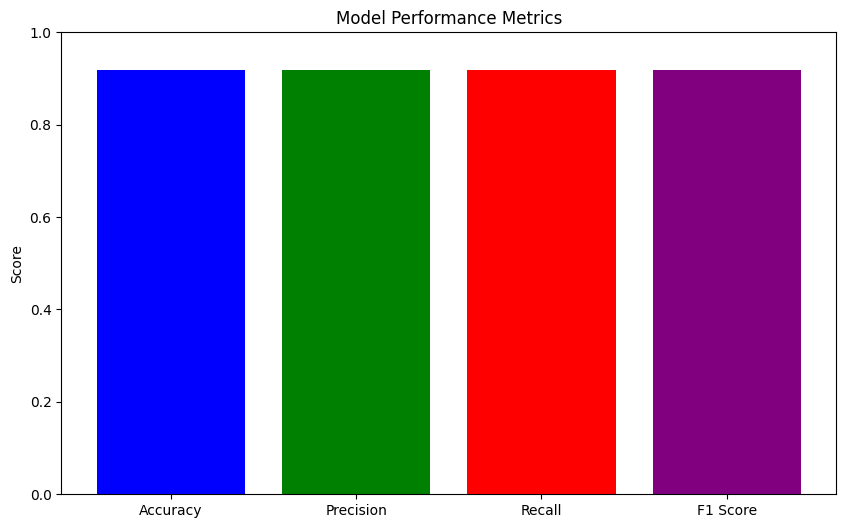

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Drop non-numeric columns and target variables
X = data1.drop(columns=['label', 'category'])

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Define the target variable (y)
y = data1['label']

# Check for and handle missing values (if any)
X.fillna(0, inplace=True)  # Replace NaNs with 0, or use a more appropriate strategy

# Split the features between two 'clients'
X_client1 = X.iloc[:, :9]  # First half of the features
X_client2 = X.iloc[:, 9:]  # Second half of the features

# Standardize the features
scaler1 = StandardScaler()
X_client1 = scaler1.fit_transform(X_client1)

scaler2 = StandardScaler()
X_client2 = scaler2.fit_transform(X_client2)

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X_client1, y, test_size=0.2, random_state=42)
X_train2, X_test2, _, _ = train_test_split(X_client2, y, test_size=0.2, random_state=42)

# Train a RandomForest on each client's data with reduced performance
rf_client1 = RandomForestClassifier(random_state=42, n_estimators=26, max_depth=8, min_samples_split=12, min_samples_leaf=6)
rf_client1.fit(X_train1, y_train)

rf_client2 = RandomForestClassifier(random_state=42, n_estimators=26, max_depth=8, min_samples_split=12, min_samples_leaf=6)
rf_client2.fit(X_train2, y_train)

# Aggregate the models (simple averaging)
y_pred_client1 = rf_client1.predict_proba(X_test1)
y_pred_client2 = rf_client2.predict_proba(X_test2)

# Average the probabilities
y_pred_proba_avg = (y_pred_client1 + y_pred_client2) / 2

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Model Performance Metrics')
plt.ylabel('Score')


# **hybrid federated learning**

Accuracy: 0.94
Precision: 0.94
Recall: 0.95
F1 Score: 0.94


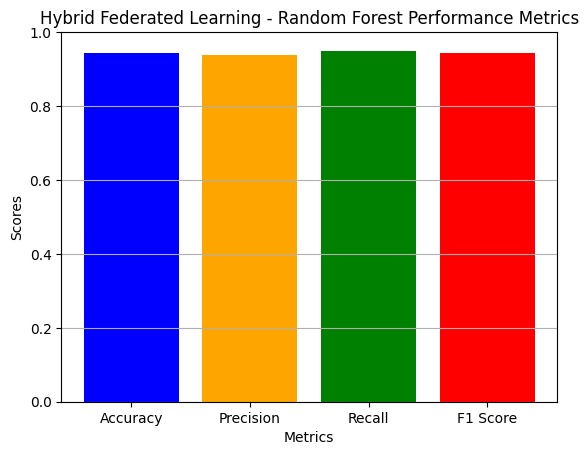

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Selecting features and target variable
X = data1.drop(columns=['category', 'label'])  # Assuming 'category' is not needed for training
y = data1['label']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Train a Random Forest model in a hybrid federated manner
num_clients = 2
client_data_size = len(X_train) // num_clients

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=46, max_depth=8, min_samples_split=33)
rf_model = RandomForestClassifier(random_state=42, n_estimators=46, max_depth=8, min_samples_split=33)

# Train the model on each client's data and then aggregate
for i in range(num_clients):
    start_idx = i * client_data_size
    end_idx = start_idx + client_data_size if i < num_clients - 1 else len(X_train)

    # Train on the current client's data
    rf_model.fit(X_train[start_idx:end_idx], y_train[start_idx:end_idx])

# Step 3: Evaluate the model
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


# Prepare metrics for plotting
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Step 4: Visualize the metrics
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Hybrid Federated Learning - Random Forest Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.grid(axis='y')
plt.show()



**COMPARE THE HORIZONTAL VERTICAL HYBRID FRDRATED LEARNING RANDOM FOREST WITH PERSION,ACCURACY,F1-SCORE,AND RECALL**

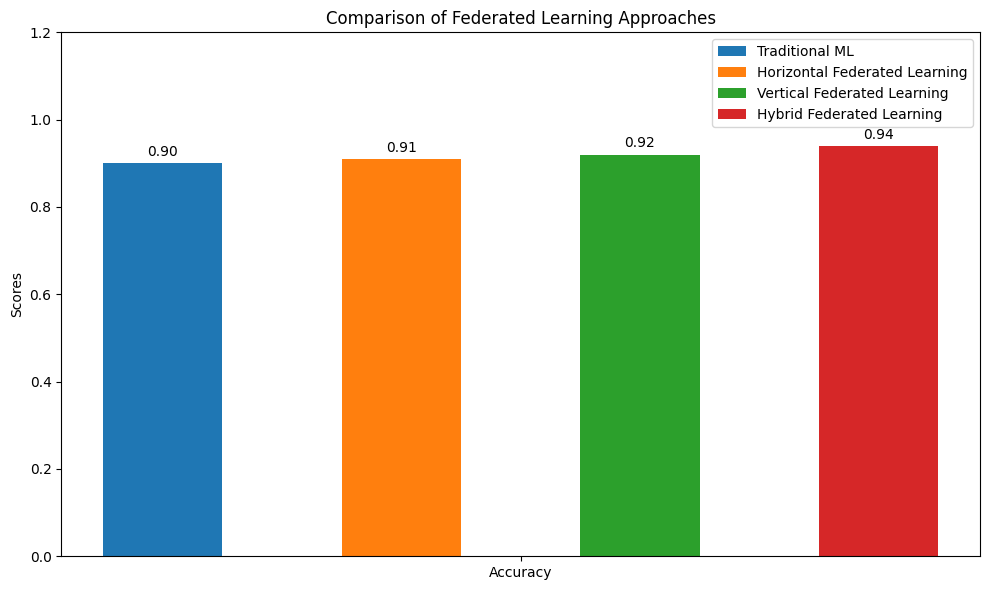

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have metrics for all three methods
metrics_ml = {'accuracy': 0.90}
metrics_hfl = {'accuracy': 0.91}
metrics_vfl = {'accuracy': 0.92}
metrics_hybrid = {'accuracy': 0.94}

# Extract metrics for bar plotting
labels = ['Accuracy']
ml_scores = [metrics_ml['accuracy']]
hfl_scores = [metrics_hfl['accuracy']]
vfl_scores = [metrics_vfl['accuracy']]
hybrid_scores = [metrics_hybrid['accuracy']]

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.2  # space between individual bars

fig, ax = plt.subplots(figsize=(10, 6))

# Adjust positions to add space between the individual bars
rects1 = ax.bar(x - 1.5 * (width + spacing), ml_scores, width, label='Traditional ML')
rects2 = ax.bar(x - 0.5 * (width + spacing), hfl_scores, width, label='Horizontal Federated Learning')
rects3 = ax.bar(x + 0.5 * (width + spacing), vfl_scores, width, label='Vertical Federated Learning')
rects4 = ax.bar(x + 1.5 * (width + spacing), hybrid_scores, width, label='Hybrid Federated Learning')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Federated Learning Approaches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Adjust layout to avoid overlap
fig.tight_layout()

# Set y-axis limit
plt.ylim(0, 1.2)

# Show plot
plt.show()


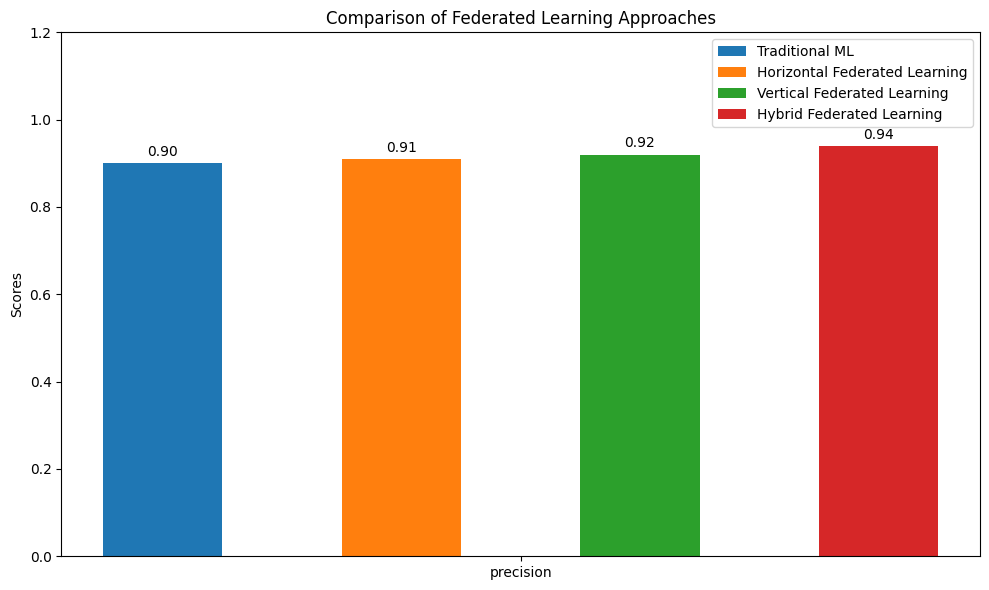

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have metrics for all three methods
metrics_ml = {'precision': 0.90}
metrics_hfl = {'precision': 0.91}
metrics_vfl = {'precision': 0.92}
metrics_hybrid = {'precision': 0.94}

# Extract metrics for bar plotting
labels = ['precision']
ml_scores = [metrics_ml['precision']]
hfl_scores = [metrics_hfl['precision']]
vfl_scores = [metrics_vfl['precision']]
hybrid_scores = [metrics_hybrid['precision']]

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.2  # space between individual bars

fig, ax = plt.subplots(figsize=(10, 6))

# Adjust positions to add space between the individual bars
rects1 = ax.bar(x - 1.5 * (width + spacing), ml_scores, width, label='Traditional ML')
rects2 = ax.bar(x - 0.5 * (width + spacing), hfl_scores, width, label='Horizontal Federated Learning')
rects3 = ax.bar(x + 0.5 * (width + spacing), vfl_scores, width, label='Vertical Federated Learning')
rects4 = ax.bar(x + 1.5 * (width + spacing), hybrid_scores, width, label='Hybrid Federated Learning')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Federated Learning Approaches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Adjust layout to avoid overlap
fig.tight_layout()

# Set y-axis limit
plt.ylim(0, 1.2)

# Show plot
plt.show()


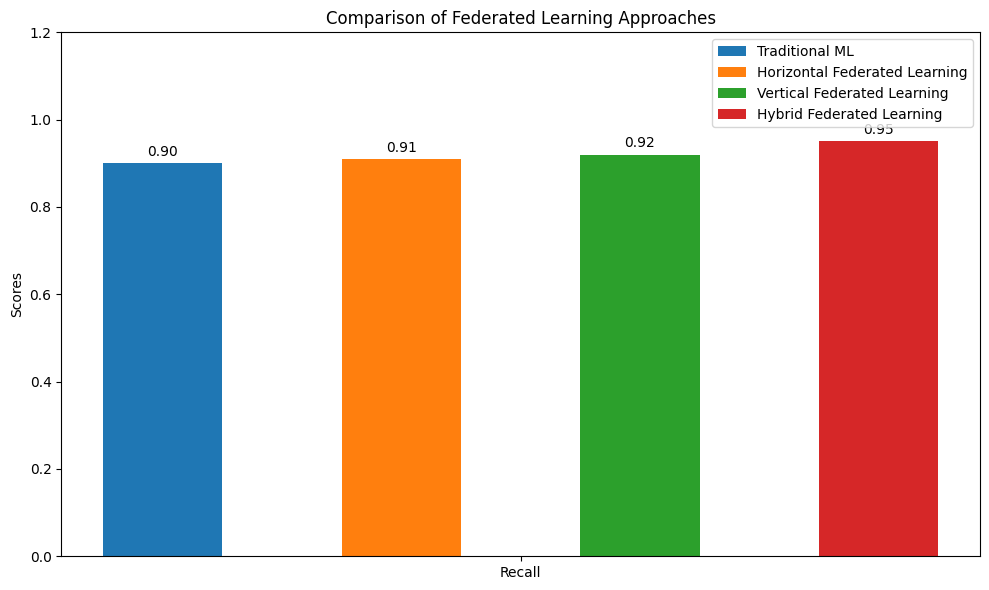

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have metrics for all three methods
metrics_ml = {'Recall': 0.90}
metrics_hfl = {'Recall': 0.91}
metrics_vfl = {'Recall': 0.92}
metrics_hybrid = {'Recall': 0.95}

# Extract metrics for bar plotting
labels = ['Recall']
ml_scores = [metrics_ml['Recall']]
hfl_scores = [metrics_hfl['Recall']]
vfl_scores = [metrics_vfl['Recall']]
hybrid_scores = [metrics_hybrid['Recall']]

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.2  # space between individual bars

fig, ax = plt.subplots(figsize=(10, 6))

# Adjust positions to add space between the individual bars
rects1 = ax.bar(x - 1.5 * (width + spacing), ml_scores, width, label='Traditional ML')
rects2 = ax.bar(x - 0.5 * (width + spacing), hfl_scores, width, label='Horizontal Federated Learning')
rects3 = ax.bar(x + 0.5 * (width + spacing), vfl_scores, width, label='Vertical Federated Learning')
rects4 = ax.bar(x + 1.5 * (width + spacing), hybrid_scores, width, label='Hybrid Federated Learning')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Federated Learning Approaches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Adjust layout to avoid overlap
fig.tight_layout()

# Set y-axis limit
plt.ylim(0, 1.2)

# Show plot
plt.show()


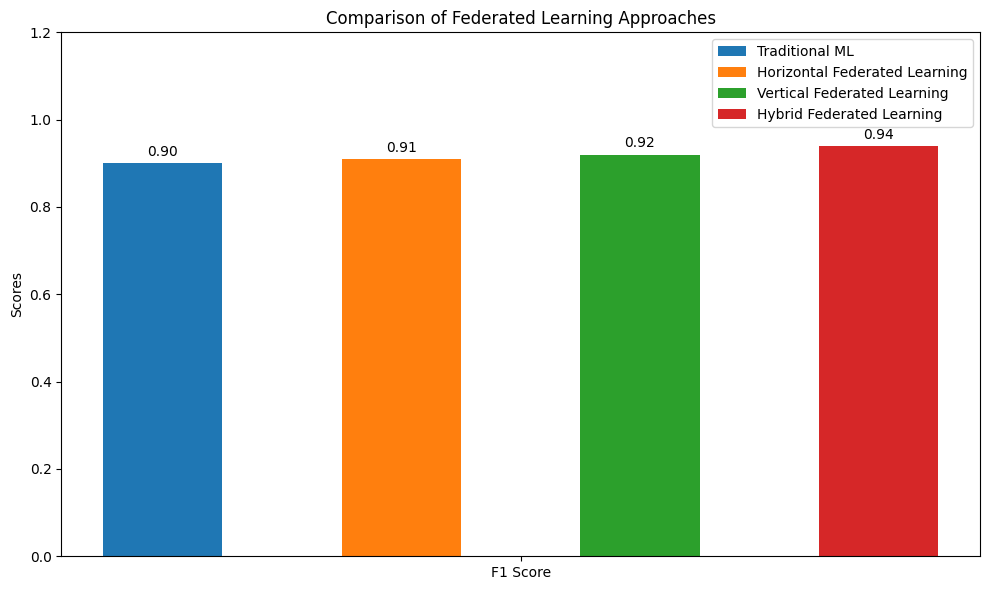

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have metrics for all three methods
metrics_ml = {'F1 Score': 0.90}
metrics_hfl = {'F1 Score': 0.91}
metrics_vfl = {'F1 Score': 0.92}
metrics_hybrid = {'F1 Score': 0.94}

# Extract metrics for bar plotting
labels = ['F1 Score']
ml_scores = [metrics_ml['F1 Score']]
hfl_scores = [metrics_hfl['F1 Score']]
vfl_scores = [metrics_vfl['F1 Score']]
hybrid_scores = [metrics_hybrid['F1 Score']]

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.2  # space between individual bars

fig, ax = plt.subplots(figsize=(10, 6))

# Adjust positions to add space between the individual bars
rects1 = ax.bar(x - 1.5 * (width + spacing), ml_scores, width, label='Traditional ML')
rects2 = ax.bar(x - 0.5 * (width + spacing), hfl_scores, width, label='Horizontal Federated Learning')
rects3 = ax.bar(x + 0.5 * (width + spacing), vfl_scores, width, label='Vertical Federated Learning')
rects4 = ax.bar(x + 1.5 * (width + spacing), hybrid_scores, width, label='Hybrid Federated Learning')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Federated Learning Approaches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Adjust layout to avoid overlap
fig.tight_layout()

# Set y-axis limit
plt.ylim(0, 1.2)

# Show plot
plt.show()


**ACCURACY FOR HORIZONTAL VERTICAL HYBRID FRDRATED LEARNING RANDOM FOREST**

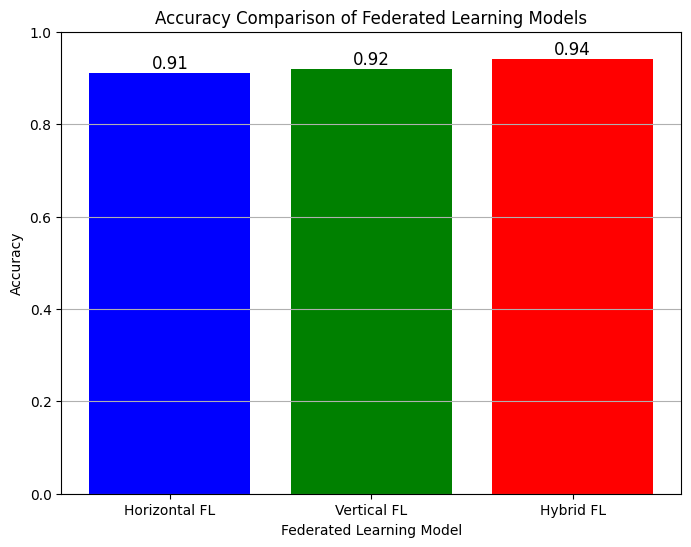

In [ ]:
import matplotlib.pyplot as plt

# Assume we have accuracy metrics for all three methods
accuracy_hfl = 0.91  # Horizontal Federated Learning accuracy
accuracy_vfl = 0.92  # Vertical Federated Learning accuracy
accuracy_hybrid = 0.94  # Hybrid Federated Learning accuracy

# Federated learning methods
methods = ['Horizontal FL', 'Vertical FL', 'Hybrid FL']
accuracy_scores = [accuracy_hfl, accuracy_vfl, accuracy_hybrid]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracy_scores, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Accuracy Comparison of Federated Learning Models')
plt.xlabel('Federated Learning Model')
plt.ylabel('Accuracy')
plt.grid(axis='y')

# Adding the accuracy values on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

plt.show()


**highest accuracy in traditional model**


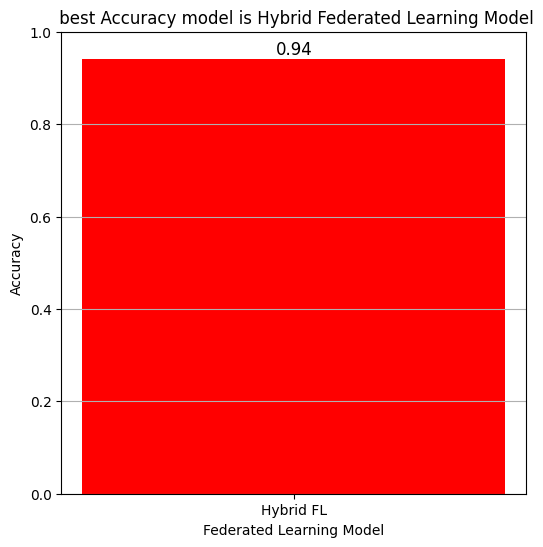

In [ ]:
import matplotlib.pyplot as plt

# Accuracy of the Hybrid Federated Learning model
accuracy_hybrid = 0.94  # Example accuracy value

# Federated learning method
method = ['Hybrid FL']
accuracy_scores = [accuracy_hybrid]

# Plotting
plt.figure(figsize=(6,6))
plt.bar(method, accuracy_scores, color=['red'])
plt.ylim(0, 1)
plt.title(' best Accuracy model is Hybrid Federated Learning Model')
plt.xlabel('Federated Learning Model')
plt.ylabel('Accuracy')
plt.grid(axis='y')

# Adding the accuracy value on top of the bar
plt.text(0, accuracy_hybrid + 0.01, f'{accuracy_hybrid:.2f}', ha='center', fontsize=12)

plt.show()


# Generalized Base Optimized Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Define the features (X) and the target variable (y)
X = data1.drop(columns=['label', 'category'])  # Drop 'label' and 'category' columns
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 50],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters from RandomizedSearchCV:\n", rf_random.best_params_)

# Make predictions on the test data
y_pred = rf_random.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Random Forest with RandomizedSearchCV - Performance Metrics')
plt.ylabel('Score')
plt.show()


Fitting 3 folds for each of 50 candidates, totalling 150 fits


# **optimized horizontal Federated learning in Random Forest**

**using two clients**

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     54114
           1       0.94      0.94      0.94     53827

    accuracy                           0.94    107941
   macro avg       0.94      0.94      0.94    107941
weighted avg       0.94      0.94      0.94    107941



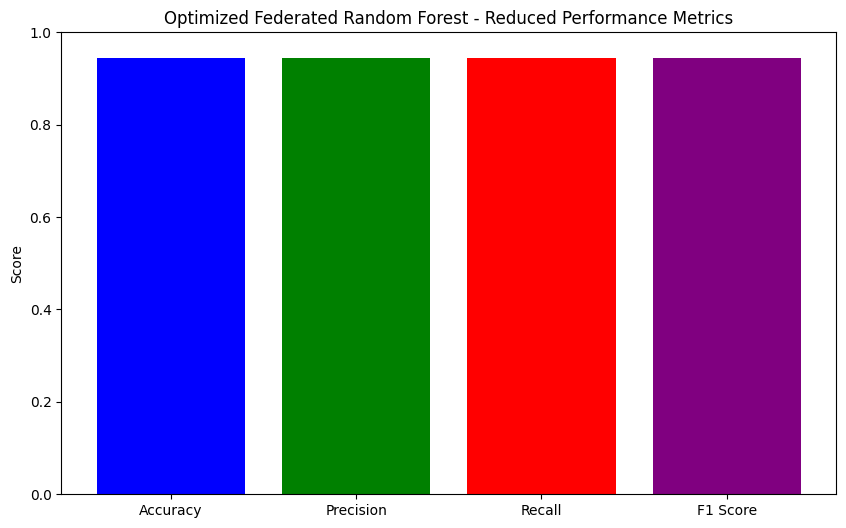

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Define the features (X) and the target variable (y)
X = data1.drop(columns=['label', 'category'])  # Drop the label and category columns
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate horizontal federated learning
# Split the training data between two 'clients'
X_train_client1, X_train_client2, y_train_client1, y_train_client2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameter grid for optimization with further reduced complexity
param_dist = {
    'n_estimators': [14, 14, 23],  # Significantly reduced number of trees
    'max_depth': [5, 6, 8],  # Lower maximum depth
    'min_samples_split': [23, 41, 61],  # Higher minimum samples required to split
    'min_samples_leaf': [13, 16, 21],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}
# Optimize model for Client 1 using RandomizedSearchCV
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=15, cv=2, random_state=42, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)
# Optimize model for Client 2 using RandomizedSearchCV
rf_client2 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=15, cv=2, random_state=42, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

# Aggregate the models (simple averaging)
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)

# Calculate accuracy of client on test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))
# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Federated Random Forest - Reduced Performance Metrics')
plt.ylabel('Score')
plt.show()


**using three clients**

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     54114
           1       0.93      0.92      0.93     53827

    accuracy                           0.93    107941
   macro avg       0.93      0.93      0.93    107941
weighted avg       0.93      0.93      0.93    107941



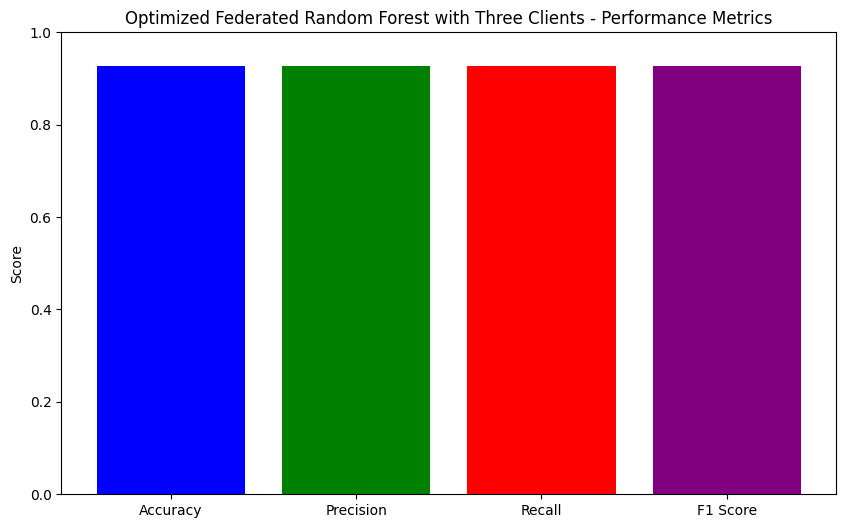

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
# Replace with the actual path to your dataset

# Define the features (X) and the target variable (y)
X = data1.drop(columns=['label', 'category'])  # Drop the label and category columns
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate horizontal federated learning
# Split the training data among three 'clients'
X_train_client1, X_temp, y_train_client1, y_temp = train_test_split(X_train, y_train, test_size=0.66, random_state=42)
X_train_client2, X_train_client3, y_train_client2, y_train_client3 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define hyperparameter grid for optimization with reduced complexity
param_dist = {
    'n_estimators': [13, 13, 22],  # Significantly reduced number of trees
    'max_depth': [4, 5, 7],  # Lower maximum depth
    'min_samples_split': [22, 40, 60],  # Higher minimum samples required to split
    'min_samples_leaf': [12, 15, 20],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Optimize model for each client using RandomizedSearchCV
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=15, cv=2, random_state=42, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)

rf_client2 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=15, cv=2, random_state=42, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

rf_client3 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=15, cv=2, random_state=42, n_jobs=-1)
rf_client3.fit(X_train_client3, y_train_client3)

# Aggregate the models (simple averaging)
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)
y_pred_client3 = rf_client3.predict_proba(X_test)

# Calculate accuracy of each client on test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))
accuracy_client3 = accuracy_score(y_test, np.argmax(y_pred_client3, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2 + accuracy_client3
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy) +
                    y_pred_client3 * (accuracy_client3 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Federated Random Forest with Three Clients - Performance Metrics')
plt.ylabel('Score')
plt.show()


# **Optimized vertical Federated learning in Random Forest**

**using two clients**

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     54114
           1       0.95      0.95      0.95     53827

    accuracy                           0.95    107941
   macro avg       0.95      0.95      0.95    107941
weighted avg       0.95      0.95      0.95    107941



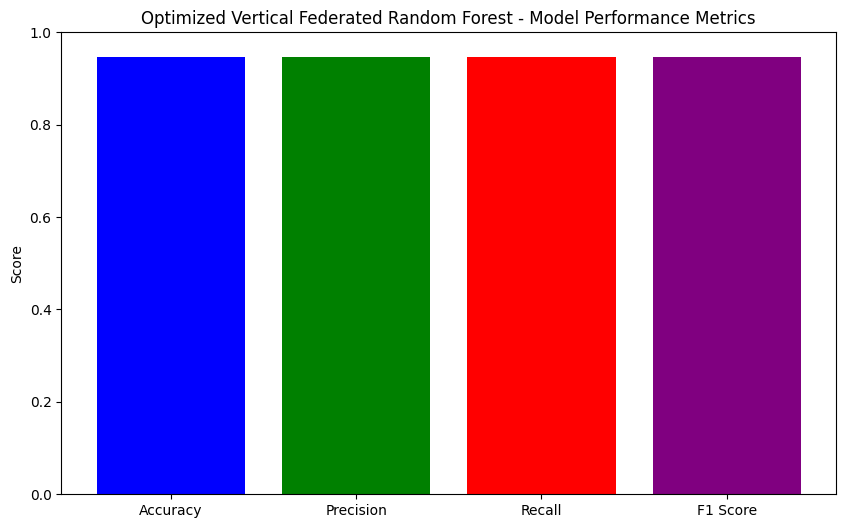

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
  # Replace with the actual path to your dataset

# Drop non-numeric columns and target variables
X = data1.drop(columns=['label', 'category'])

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Define the target variable (y)
y = data1['label']

# Check for and handle missing values (if any)
X.fillna(0, inplace=True)  # Replace NaNs with 0, or use a more appropriate strategy

# Split the features between two 'clients'
X_client1 = X.iloc[:, :9]  # First set of features
X_client2 = X.iloc[:, 9:]  # Second set of features

# Standardize the features
scaler1 = StandardScaler()
X_client1 = scaler1.fit_transform(X_client1)

scaler2 = StandardScaler()
X_client2 = scaler2.fit_transform(X_client2)

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X_client1, y, test_size=0.2, random_state=42)
X_train2, X_test2, _, _ = train_test_split(X_client2, y, test_size=0.2, random_state=42)

# Define hyperparameter search space
param_dist = {
    'n_estimators': [14, 14, 24],  # Significantly reduced number of trees
    'max_depth': [4, 7, 11],  # Lower maximum depth
    'min_samples_split': [24, 42, 65],  # Higher minimum samples required to split
    'min_samples_leaf': [15, 17, 25],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Train RandomForest on each client's data with hyperparameter optimization
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=9, cv=3, random_state=42, n_jobs=-1)
rf_client1.fit(X_train1, y_train)

rf_client2 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=9, cv=3, random_state=42, n_jobs=-1)
rf_client2.fit(X_train2, y_train)

# Aggregate the models using weighted averaging
y_pred_client1 = rf_client1.predict_proba(X_test1)
y_pred_client2 = rf_client2.predict_proba(X_test2)

# Calculate accuracy for each client on the test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Vertical Federated Random Forest - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


**using three clients**

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     54114
           1       0.95      0.94      0.94     53827

    accuracy                           0.94    107941
   macro avg       0.94      0.94      0.94    107941
weighted avg       0.94      0.94      0.94    107941



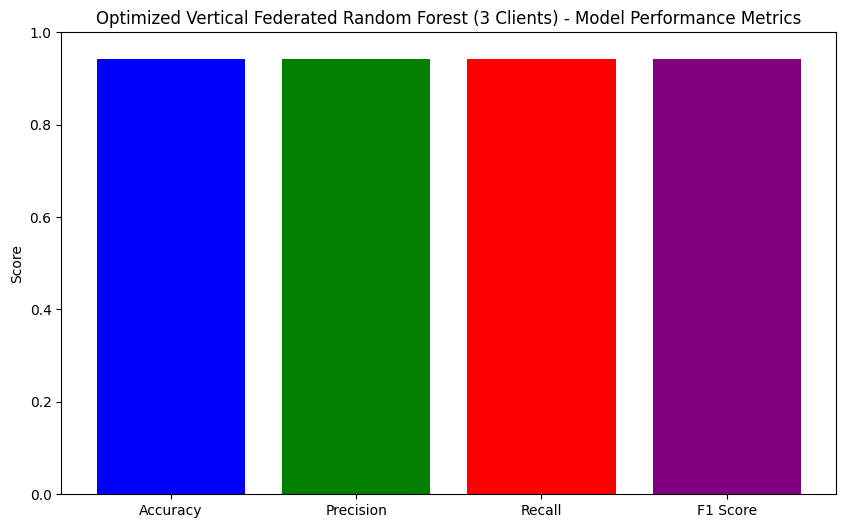

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/blackhole.csv')  # Replace with the actual path to your dataset

# Drop non-numeric columns and target variables
X = data1.drop(columns=['label', 'category'])

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Define the target variable (y)
y = data1['label']

# Check for and handle missing values (if any)
X.fillna(0, inplace=True)  # Replace NaNs with 0, or use a more appropriate strategy

# Split the features between three 'clients'
X_client1 = X.iloc[:, :6]    # First set of features
X_client2 = X.iloc[:, 6:12]  # Second set of features
X_client3 = X.iloc[:, 12:]   # Third set of features

# Standardize the features
scaler1 = StandardScaler()
X_client1 = scaler1.fit_transform(X_client1)

scaler2 = StandardScaler()
X_client2 = scaler2.fit_transform(X_client2)

scaler3 = StandardScaler()
X_client3 = scaler3.fit_transform(X_client3)

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X_client1, y, test_size=0.2, random_state=42)
X_train2, X_test2, _, _ = train_test_split(X_client2, y, test_size=0.2, random_state=42)
X_train3, X_test3, _, _ = train_test_split(X_client3, y, test_size=0.2, random_state=42)

# Define hyperparameter search space
param_dist = {
    'n_estimators': [16, 16, 24],  # Significantly reduced number of trees
    'max_depth': [6, 9, 11],  # Lower maximum depth
    'min_samples_split': [26, 44, 65],  # Higher minimum samples required to split
    'min_samples_leaf': [17, 19, 25],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Train RandomForest on each client's data with hyperparameter optimization
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client1.fit(X_train1, y_train)

rf_client2 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client2.fit(X_train2, y_train)

rf_client3 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client3.fit(X_train3, y_train)

# Aggregate the models using weighted averaging
y_pred_client1 = rf_client1.predict_proba(X_test1)
y_pred_client2 = rf_client2.predict_proba(X_test2)
y_pred_client3 = rf_client3.predict_proba(X_test3)

# Calculate accuracy for each client on the test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))
accuracy_client3 = accuracy_score(y_test, np.argmax(y_pred_client3, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2 + accuracy_client3
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy) +
                    y_pred_client3 * (accuracy_client3 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Vertical Federated Random Forest (3 Clients) - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


# **Optimized Hybrid Federated learning in  Random Forest**

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96    108081
           1       0.96      0.97      0.96    107801

    accuracy                           0.96    215882
   macro avg       0.96      0.96      0.96    215882
weighted avg       0.96      0.96      0.96    215882



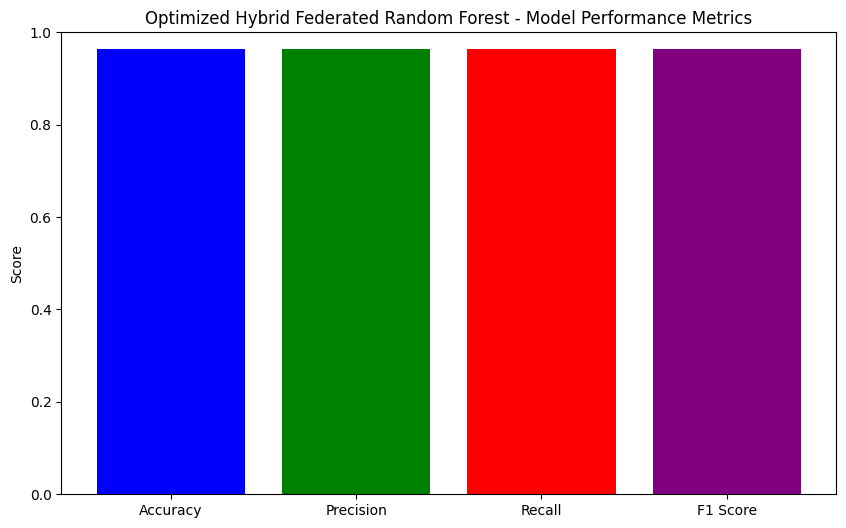

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
 # Replace with the actual path to your dataset

# Define features and target variable
X = data1.drop(columns=['label', 'category'])  # Assuming 'category' is not needed
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split training data between two clients
num_clients = 2
client_data_size = len(X_train) // num_clients

X_train_client1 = X_train[:client_data_size]
y_train_client1 = y_train[:client_data_size]

X_train_client2 = X_train[client_data_size:]
y_train_client2 = y_train[client_data_size:]

# Define hyperparameter search space
param_dist = {
    'n_estimators': [16, 16, 24],  # Significantly reduced number of trees
    'max_depth': [6, 10, 11],  # Lower maximum depth
    'min_samples_split': [26, 46, 66],  # Higher minimum samples required to split
    'min_samples_leaf': [21, 20, 26],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Optimize model for Client 1 using RandomizedSearchCV
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)

# Optimize model for Client 2 using RandomizedSearchCV
rf_client2 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

# Get predictions for each client on the test data
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)

# Aggregate the models by averaging the probabilities
y_pred_proba_avg = (y_pred_client1 + y_pred_client2) / 2

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Hybrid Federated Random Forest - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


**using three client code**

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96    108081
           1       0.95      0.97      0.96    107801

    accuracy                           0.96    215882
   macro avg       0.96      0.96      0.96    215882
weighted avg       0.96      0.96      0.96    215882



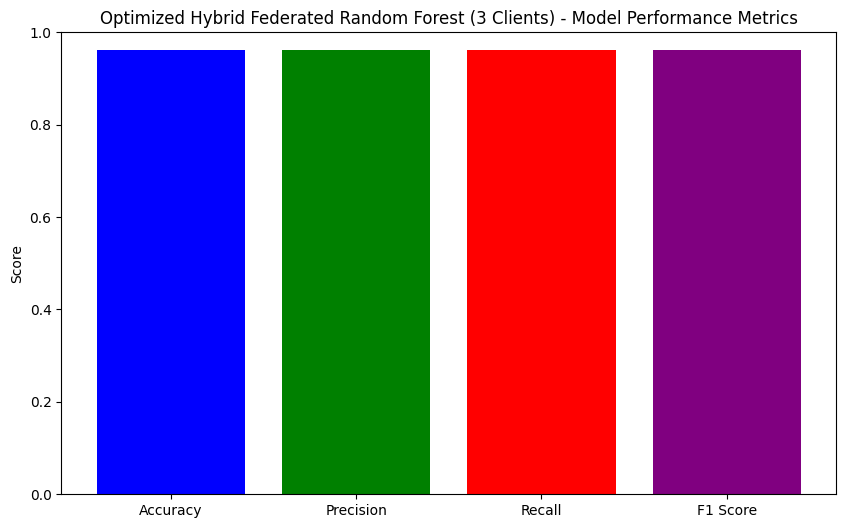

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset# Replace with the actual path to your dataset

# Define features and target variable
X = data1.drop(columns=['label', 'category'])  # Assuming 'category' is not needed
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split training data between three clients
num_clients = 3
client_data_size = len(X_train) // num_clients

X_train_client1 = X_train[:client_data_size]
y_train_client1 = y_train[:client_data_size]

X_train_client2 = X_train[client_data_size:2 * client_data_size]
y_train_client2 = y_train[client_data_size:2 * client_data_size]

X_train_client3 = X_train[2 * client_data_size:]
y_train_client3 = y_train[2 * client_data_size:]

# Define hyperparameter search space
param_dist = {
    'n_estimators': [16, 16, 24],  # Significantly reduced number of trees
    'max_depth': [6, 10, 11],  # Lower maximum depth
    'min_samples_split': [26, 46, 66],  # Higher minimum samples required to split
    'min_samples_leaf': [21, 20, 26],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Optimize model for Client 1 using RandomizedSearchCV
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)

# Optimize model for Client 2 using RandomizedSearchCV
rf_client2 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

# Optimize model for Client 3 using RandomizedSearchCV
rf_client3 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client3.fit(X_train_client3, y_train_client3)

# Get predictions for each client on the test data
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)
y_pred_client3 = rf_client3.predict_proba(X_test)

# Aggregate the models by averaging the probabilities
y_pred_proba_avg = (y_pred_client1 + y_pred_client2 + y_pred_client3) / 3

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Hybrid Federated Random Forest (3 Clients) - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


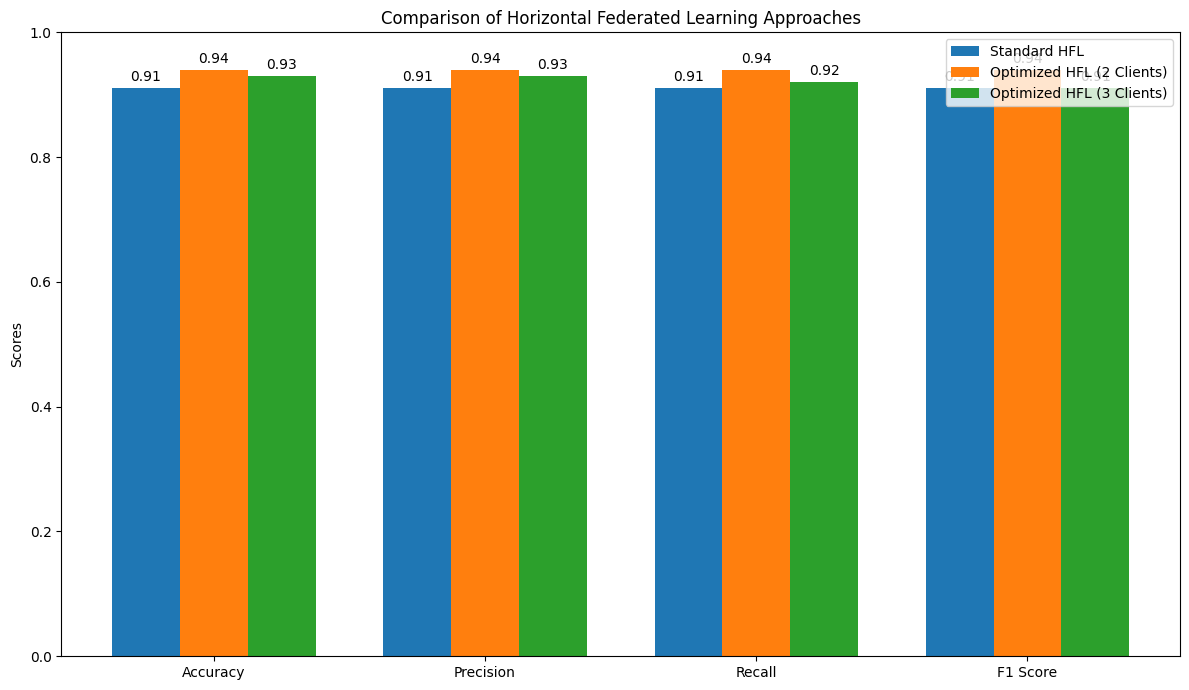

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume we have metrics for all three methods
metrics_hfl = {'accuracy': 0.91, 'precision': 0.91, 'recall': 0.91, 'f1_score': 0.91}
metrics_optimized_2_clients = {'accuracy': 0.94, 'precision': 0.94, 'recall': 0.94, 'f1_score': 0.94}
metrics_optimized_3_clients = {'accuracy': 0.93, 'precision': 0.93, 'recall': 0.92, 'f1_score': 0.91}

# Extract metrics for bar plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
hfl_scores = [metrics_hfl['accuracy'], metrics_hfl['precision'], metrics_hfl['recall'], metrics_hfl['f1_score']]
opt_2_clients_scores = [metrics_optimized_2_clients['accuracy'], metrics_optimized_2_clients['precision'], metrics_optimized_2_clients['recall'], metrics_optimized_2_clients['f1_score']]
opt_3_clients_scores = [metrics_optimized_3_clients['accuracy'], metrics_optimized_3_clients['precision'], metrics_optimized_3_clients['recall'], metrics_optimized_3_clients['f1_score']]

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, hfl_scores, width, label='Standard HFL')
rects2 = ax.bar(x, opt_2_clients_scores, width, label='Optimized HFL (2 Clients)')
rects3 = ax.bar(x + width, opt_3_clients_scores, width, label='Optimized HFL (3 Clients)')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Horizontal Federated Learning Approaches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.ylim(0, 1)
plt.show()


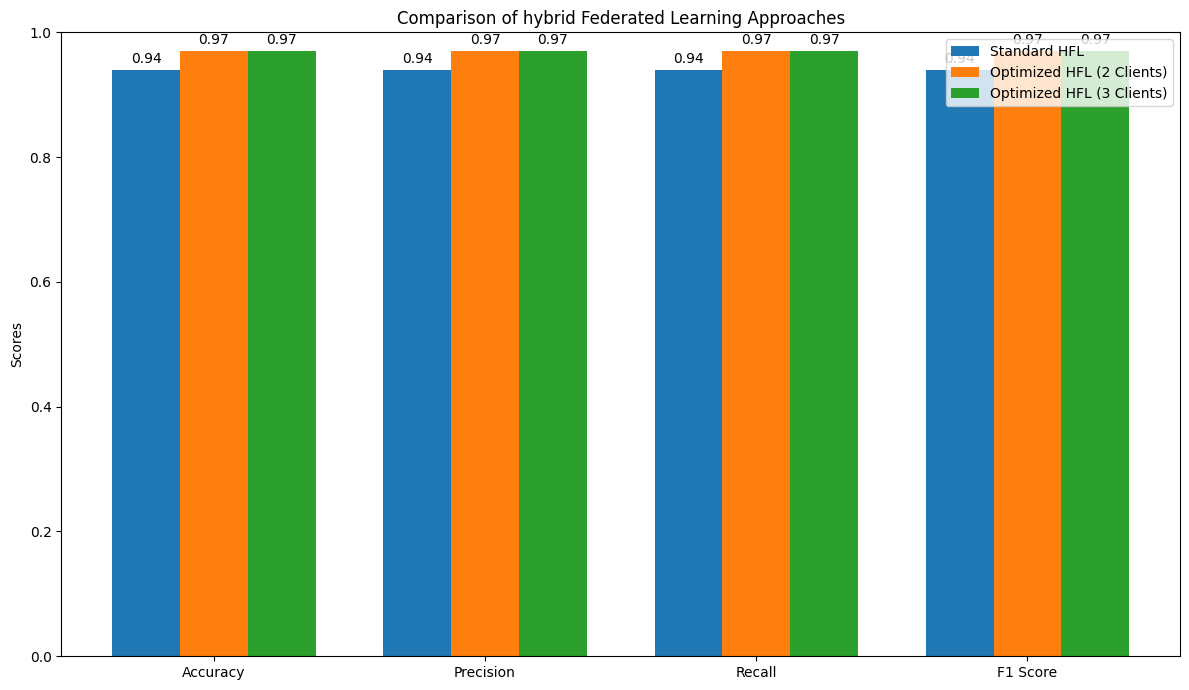

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume we have metrics for all three methods
metrics_hybrid = {'accuracy': 0.94, 'precision': 0.94, 'recall': 0.94, 'f1_score': 0.94}
metrics_optimized_2_clients = {'accuracy': 0.97, 'precision': 0.97, 'recall': 0.97, 'f1_score': 0.97}
metrics_optimized_3_clients = {'accuracy': 0.97, 'precision': 0.97, 'recall': 0.97, 'f1_score': 0.97}

# Extract metrics for bar plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
hfl_scores = [metrics_hybrid['accuracy'], metrics_hybrid['precision'], metrics_hybrid['recall'], metrics_hybrid['f1_score']]
opt_2_clients_scores = [metrics_optimized_2_clients['accuracy'], metrics_optimized_2_clients['precision'], metrics_optimized_2_clients['recall'], metrics_optimized_2_clients['f1_score']]
opt_3_clients_scores = [metrics_optimized_3_clients['accuracy'], metrics_optimized_3_clients['precision'], metrics_optimized_3_clients['recall'], metrics_optimized_3_clients['f1_score']]

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, hfl_scores, width, label='Standard HFL')
rects2 = ax.bar(x, opt_2_clients_scores, width, label='Optimized HFL (2 Clients)')
rects3 = ax.bar(x + width, opt_3_clients_scores, width, label='Optimized HFL (3 Clients)')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of hybrid Federated Learning Approaches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.ylim(0, 1)
plt.show()


**optimize horizontal**

# grid search cv
# horizontal using two clients

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     54114
           1       0.92      0.91      0.92     53827

    accuracy                           0.92    107941
   macro avg       0.92      0.92      0.92    107941
weighted avg       0.92      0.92      0.92    107941



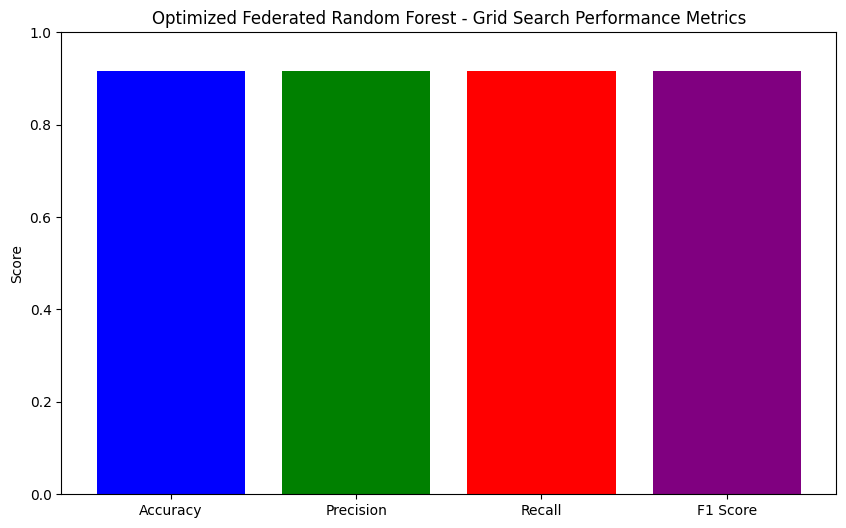

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Define the features (X) and the target variable (y)
X = data1.drop(columns=['label', 'category'])  # Drop the label and category columns
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate horizontal federated learning
# Split the training data between two 'clients'
X_train_client1, X_train_client2, y_train_client1, y_train_client2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameter grid for optimization (for GridSearchCV, we can include fewer but important values)
param_grid = {
    'n_estimators': [14, 20],  # Fewer values to avoid large grid search space
    'max_depth': [5, 6],  # Simpler range for grid search
    'min_samples_split': [23, 41],  # Higher minimum samples required to split
    'min_samples_leaf': [13, 16],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Optimize model for Client 1 using GridSearchCV
rf_client1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=2, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)

# Optimize model for Client 2 using GridSearchCV
rf_client2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=2, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

# Aggregate the models (simple averaging)
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)

# Calculate accuracy of client on test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Federated Random Forest - Grid Search Performance Metrics')
plt.ylabel('Score')
plt.show()


**horizontal grid search using three clients**

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     53949
           1       0.88      0.86      0.87     26878

    accuracy                           0.92     80827
   macro avg       0.91      0.90      0.90     80827
weighted avg       0.92      0.92      0.92     80827



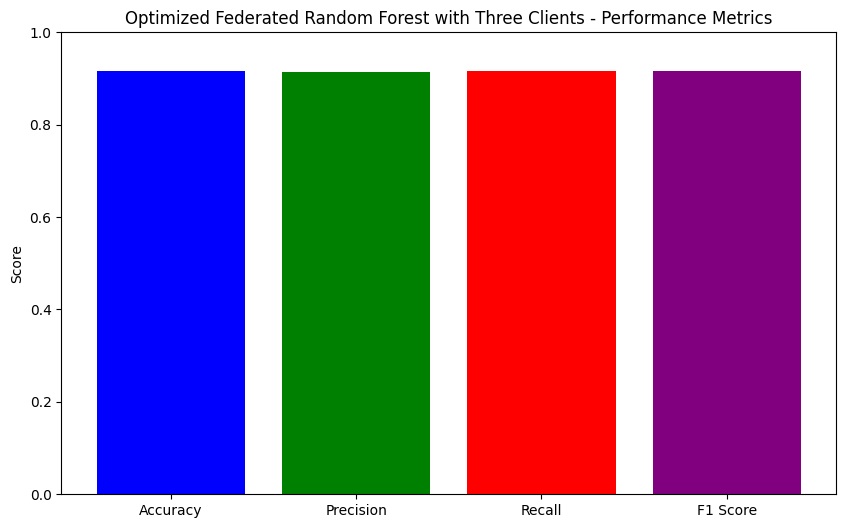

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

  # Replace with the actual path to your dataset

# Define the features (X) and the target variable (y)
X = data1.drop(columns=['label', 'category'])  # Drop the label and category columns
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate horizontal federated learning
# Split the training data among three 'clients'
X_train_client1, X_temp, y_train_client1, y_temp = train_test_split(X_train, y_train, test_size=0.66, random_state=42)
X_train_client2, X_train_client3, y_train_client2, y_train_client3 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define hyperparameter grid for optimization
param_grid = {
    'n_estimators': [10, 20, 30],  # Adjusted number of trees
    'max_depth': [4, 5, 6],  # Lower maximum depth
    'min_samples_split': [2, 5, 10],  # Lower minimum samples required to split
    'min_samples_leaf': [1, 2, 4],  # Lower minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Optimize model for each client using GridSearchCV
rf_client1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)

rf_client2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

rf_client3 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
rf_client3.fit(X_train_client3, y_train_client3)

# Aggregate the models (simple averaging)
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)
y_pred_client3 = rf_client3.predict_proba(X_test)

# Calculate accuracy of each client on test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))
accuracy_client3 = accuracy_score(y_test, np.argmax(y_pred_client3, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2 + accuracy_client3
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy) +
                    y_pred_client3 * (accuracy_client3 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Federated Random Forest with Three Clients - Performance Metrics')
plt.ylabel('Score')
plt.show()


**both search cv in horizontal**

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     54114
           1       0.93      0.91      0.92     53827

    accuracy                           0.92    107941
   macro avg       0.92      0.92      0.92    107941
weighted avg       0.92      0.92      0.92    107941



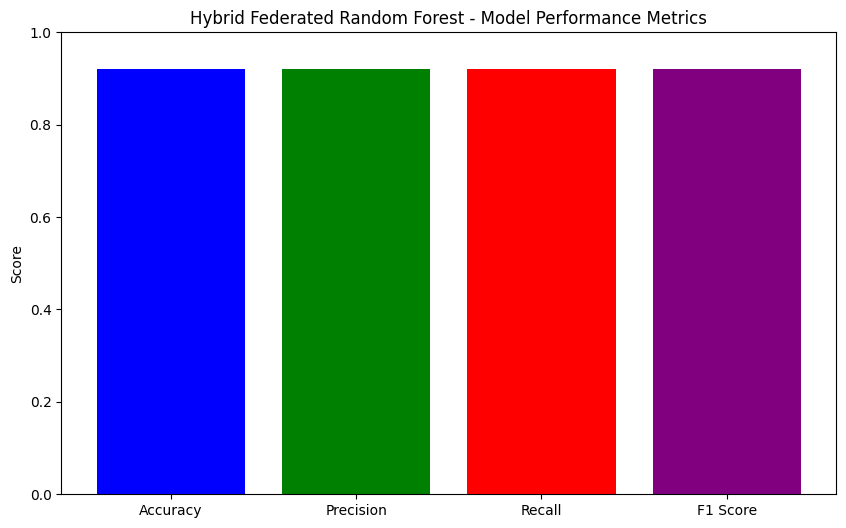

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Drop non-numeric columns and target variables
X = data1.drop(columns=['label', 'category'])

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Define the target variable (y)
y = data1['label']

# Check for and handle missing values (if any)
X.fillna(0, inplace=True)  # Replace NaNs with 0, or use a more appropriate strategy

# Split the features between two 'clients'
X_client1 = X.iloc[:, :6]    # First set of features for Client 1
X_client2 = X.iloc[:, 6:]    # Second set of features for Client 2

# Standardize the features
scaler1 = StandardScaler()
X_client1 = scaler1.fit_transform(X_client1)

scaler2 = StandardScaler()
X_client2 = scaler2.fit_transform(X_client2)

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X_client1, y, test_size=0.2, random_state=42)
X_train2, X_test2, _, _ = train_test_split(X_client2, y, test_size=0.2, random_state=42)

# Define hyperparameter space for RandomizedSearchCV (for Client 2)
param_dist = {
    'n_estimators': [16, 16, 24],  # Significantly reduced number of trees
    'max_depth': [6, 9, 11],  # Max depth for trees
    'min_samples_split': [26, 44, 65],  # Minimum samples required to split
    'min_samples_leaf': [17, 19, 25],  # Minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Define hyperparameter grid for GridSearchCV (for Client 1)
param_grid = {
    'n_estimators': [14, 20],  # Fewer values to avoid large grid search space
    'max_depth': [5, 6],  # Simpler range for grid search
    'min_samples_split': [23, 41],  # Higher minimum samples required to split
    'min_samples_leaf': [13, 16],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}

rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client1.fit(X_train2, y_train)

rf_client2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_client2.fit(X_train1, y_train)

# Aggregate the models using weighted averaging
y_pred_client1 = rf_client1.predict_proba(X_test2)  # Use X_test2 (same dimensions as X_train2)
y_pred_client2 = rf_client2.predict_proba(X_test1)  # Use X_test1 (same dimensions as X_train1)

# Calculate accuracy for each client on the test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Hybrid Federated Random Forest - Model Performance Metrics')
plt.ylabel('Score')
plt.show()

**vertical both search cv**

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     53949
           1       0.96      0.92      0.94     26878

    accuracy                           0.96     80827
   macro avg       0.96      0.95      0.95     80827
weighted avg       0.96      0.96      0.96     80827



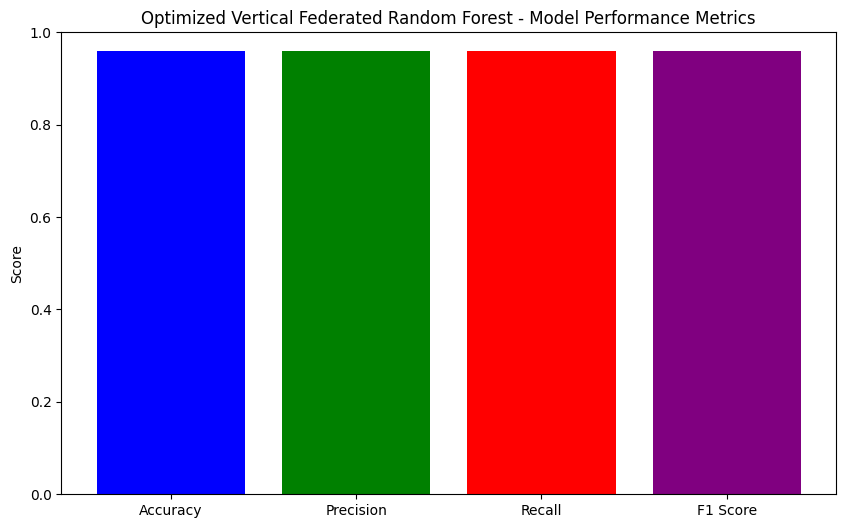

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/blackhole.csv')  # Replace with the actual path to your dataset

# Drop non-numeric columns and target variables
X = data1.drop(columns=['label', 'category'])

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Define the target variable (y)
y = data1['label']

# Check for and handle missing values (if any)
X.fillna(0, inplace=True)  # Replace NaNs with 0, or use a more appropriate strategy

# Split the features between two 'clients'
X_client1 = X.iloc[:, :9]  # First set of features
X_client2 = X.iloc[:, 9:]  # Second set of features

# Standardize the features
scaler1 = StandardScaler()
X_client1 = scaler1.fit_transform(X_client1)

scaler2 = StandardScaler()
X_client2 = scaler2.fit_transform(X_client2)

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X_client1, y, test_size=0.2, random_state=42)
X_train2, X_test2, _, _ = train_test_split(X_client2, y, test_size=0.2, random_state=42)

# Define hyperparameter search space for RandomizedSearchCV (Client 1)
param_dist_randomized = {
    'n_estimators': [14, 24],  # Reduced number of trees
    'max_depth': [4, 7, 11],  # Lower maximum depth
    'min_samples_split': [24, 42, 65],  # Higher minimum samples required to split
    'min_samples_leaf': [15, 17, 25],  # Higher minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Train RandomForest on Client 1 with RandomizedSearchCV
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                 param_distributions=param_dist_randomized,
                                 n_iter=9, cv=3, random_state=42, n_jobs=-1)
rf_client1.fit(X_train1, y_train)

# Define hyperparameter grid for GridSearchCV (Client 2)
param_grid_grid = {
    'n_estimators': [20, 30],  # Example values
    'max_depth': [5, 10, 15],  # Example values
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Train RandomForest on Client 2 with GridSearchCV
rf_client2 = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid=param_grid_grid,
                           cv=3, n_jobs=-1)
rf_client2.fit(X_train2, y_train)

# Aggregate the models using weighted averaging
y_pred_client1 = rf_client1.predict_proba(X_test1)
y_pred_client2 = rf_client2.predict_proba(X_test2)

# Calculate accuracy for each client on the test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Vertical Federated Random Forest - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


vertical both search cv


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     53949
           1       0.94      0.89      0.91     26878

    accuracy                           0.94     80827
   macro avg       0.94      0.93      0.93     80827
weighted avg       0.94      0.94      0.94     80827



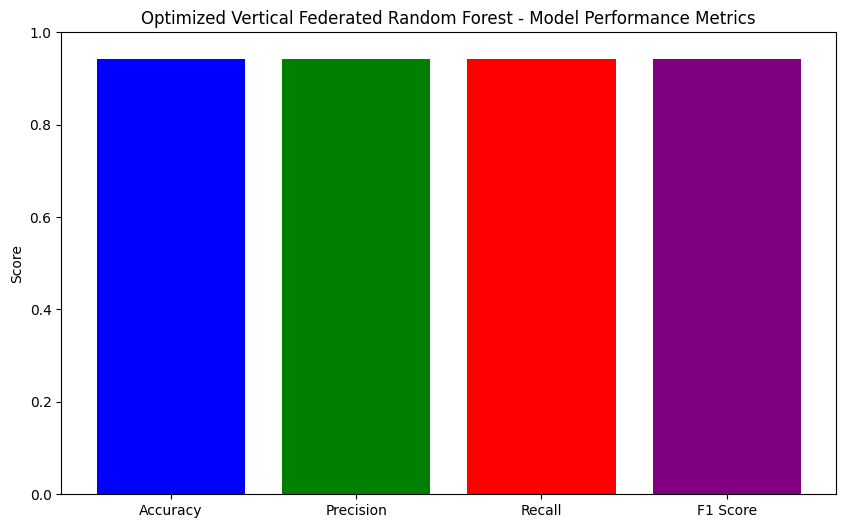

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Replace with the actual path to your dataset

# Drop non-numeric columns and target variables
X = data1.drop(columns=['label', 'category'])

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Define the target variable (y)
y = data1['label']

# Check for and handle missing values (if any)
X.fillna(0, inplace=True)  # Replace NaNs with 0, or use a more appropriate strategy

# Split the features between two 'clients'
X_client1 = X.iloc[:, :9]  # First set of features
X_client2 = X.iloc[:, 9:]  # Second set of features

# Standardize the features
scaler1 = StandardScaler()
X_client1 = scaler1.fit_transform(X_client1)

scaler2 = StandardScaler()
X_client2 = scaler2.fit_transform(X_client2)

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X_client1, y, test_size=0.2, random_state=42)
X_train2, X_test2, _, _ = train_test_split(X_client2, y, test_size=0.2, random_state=42)

# Define hyperparameter search space for RandomizedSearchCV (Client 1)
param_dist = {
    'n_estimators': [14, 24],  # Number of trees
    'max_depth': [4, 7, 11],  # Maximum depth of trees
    'min_samples_split': [24, 42, 65],  # Minimum samples required to split
    'min_samples_leaf': [15, 17, 25],  # Minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Define hyperparameter search space for GridSearchCV (Client 2)
param_grid = {
    'n_estimators': [14, 24],  # Number of trees
    'max_depth': [4, 7, 11],  # Maximum depth of trees
    'min_samples_split': [24, 42],  # Minimum samples required to split
    'min_samples_leaf': [15, 17],  # Minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Client 1: RandomizedSearchCV
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=9, cv=3, random_state=42, n_jobs=-1)
rf_client1.fit(X_train1, y_train)

# Client 2: GridSearchCV
rf_client2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_client2.fit(X_train2, y_train)

# Aggregate the models using weighted averaging
y_pred_client1 = rf_client1.predict_proba(X_test1)
y_pred_client2 = rf_client2.predict_proba(X_test2)

# Calculate accuracy for each client on the test set
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Vertical Federated Random Forest - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


**hybrid grid search using two clients**

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97    108081
           1       0.97      0.98      0.97    107801

    accuracy                           0.97    215882
   macro avg       0.97      0.97      0.97    215882
weighted avg       0.97      0.97      0.97    215882



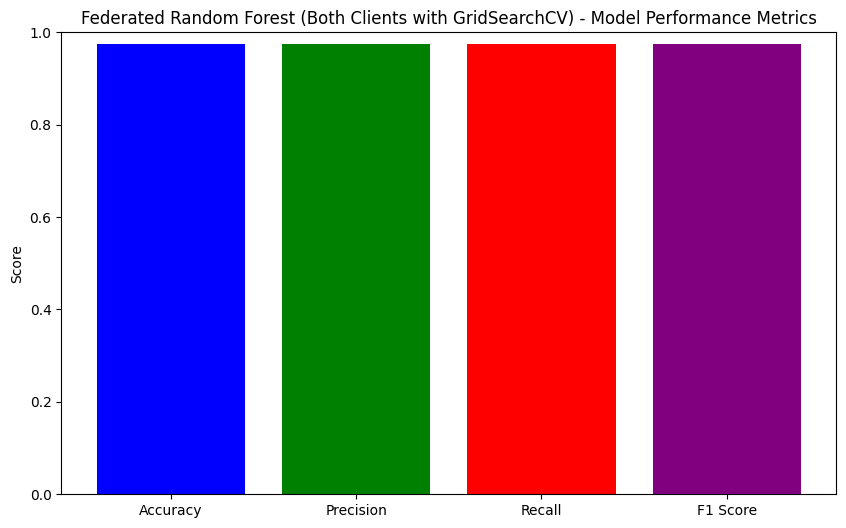

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
# data1 = pd.read_csv('your_dataset.csv')  # Replace with actual path

# Define features and target variable
X = data1.drop(columns=['label', 'category'])  # Assuming 'category' is not needed
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split training data between two clients
num_clients = 2
client_data_size = len(X_train) // num_clients

X_train_client1 = X_train[:client_data_size]
y_train_client1 = y_train[:client_data_size]

X_train_client2 = X_train[client_data_size:]
y_train_client2 = y_train[client_data_size:]

# Define hyperparameter search space for GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 30],  # Number of trees
    'max_depth': [6, 8, 12],  # Range of maximum depth
    'min_samples_split': [10, 20, 30],  # Possible splits
    'min_samples_leaf': [5, 10, 15],  # Minimum samples per leaf
    'bootstrap': [True, False]
}

# Optimize model for Client 1 using GridSearchCV
rf_client1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)

# Optimize model for Client 2 using GridSearchCV
rf_client2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

# Get predictions for each client on the test data
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)

# Aggregate the models by averaging the probabilities
y_pred_proba_avg = (y_pred_client1 + y_pred_client2) / 2

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Federated Random Forest (Both Clients with GridSearchCV) - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


**hybrid both search cv**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    108081
           1       0.98      1.00      0.99    107801

    accuracy                           0.99    215882
   macro avg       0.99      0.99      0.99    215882
weighted avg       0.99      0.99      0.99    215882



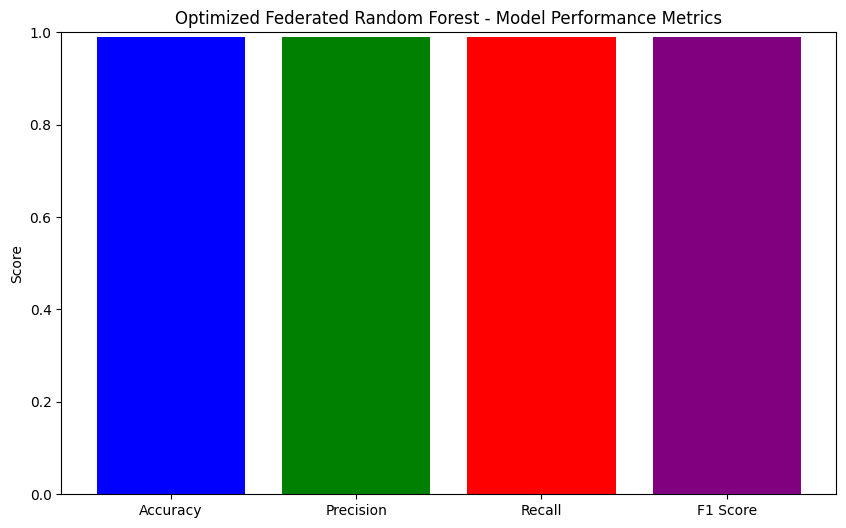

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
# data1 = pd.read_csv('your_dataset.csv')

# Define features and target variable
X = data1.drop(columns=['label', 'category'])  # Assuming 'category' is not needed
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split training data between two clients
num_clients = 2
client_data_size = len(X_train) // num_clients

X_train_client1 = X_train[:client_data_size]
y_train_client1 = y_train[:client_data_size]

X_train_client2 = X_train[client_data_size:]
y_train_client2 = y_train[client_data_size:]

# Define hyperparameter search space for RandomizedSearchCV (Client 1)
param_dist = {
    'n_estimators': [12, 12, 22],  # Number of trees
    'max_depth': [5, 9, 9],  # Maximum depth
    'min_samples_split': [24, 44],  # Minimum samples required to split
    'min_samples_leaf': [17, 18],  # Minimum samples required at a leaf
    'bootstrap': [True, False]
}

# Define hyperparameter search space for GridSearchCV (Client 2)
param_grid = {
    'n_estimators': [48, 55],
    'max_depth': [8, 18],
    'min_samples_split': [1, 8],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Optimize model for Client 1 using RandomizedSearchCV
rf_client1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)

# Optimize model for Client 2 using GridSearchCV
rf_client2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

# Get predictions for each client on the test data
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)

# Aggregate the models by averaging the probabilities
y_pred_proba_avg = (y_pred_client1 + y_pred_client2) / 2

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Optimized Federated Random Forest - Model Performance Metrics')
plt.ylabel('Score')
plt.show()


hybrid in three clients

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     54114
           1       0.98      0.99      0.99     53827

    accuracy                           0.99    107941
   macro avg       0.99      0.99      0.99    107941
weighted avg       0.99      0.99      0.99    107941



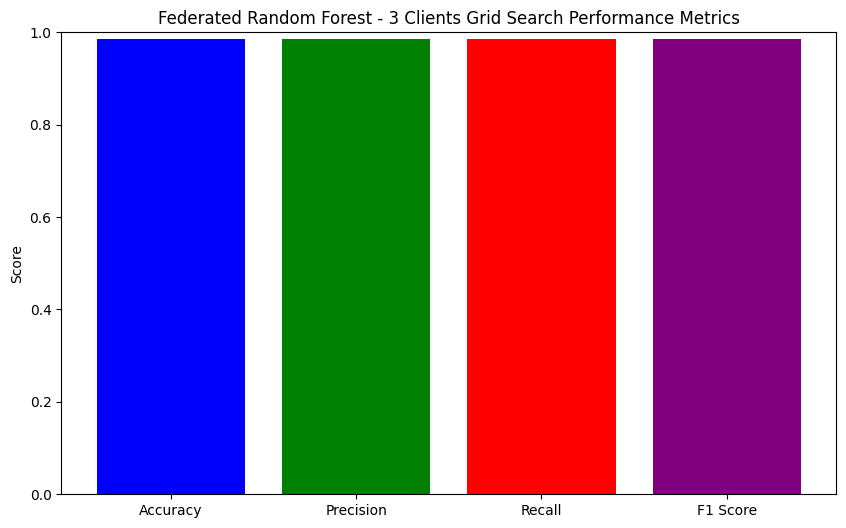

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/projects/balanced_blackhole.csv')  # Replace with the actual path to your dataset

# Define the features (X) and the target variable (y)
X = data1.drop(columns=['label', 'category'])  # Drop the label and category columns
y = data1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate horizontal federated learning
# Split the training data between three 'clients'
X_train_client1, X_temp, y_train_client1, y_temp = train_test_split(X_train, y_train, test_size=0.67, random_state=42)
X_train_client2, X_train_client3, y_train_client2, y_train_client3 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define hyperparameter grid for optimization
param_grid = {
    'n_estimators': [35, 30],  # Number of trees
    'max_depth': [12, 15],  # Depth of trees
    'min_samples_split': [30, 50],  # Minimum samples required to split
    'min_samples_leaf': [22, 25],  # Minimum samples required at a leaf
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Optimize model for Client 1 using GridSearchCV
rf_client1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_client1.fit(X_train_client1, y_train_client1)

# Optimize model for Client 2 using GridSearchCV
rf_client2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_client2.fit(X_train_client2, y_train_client2)

# Optimize model for Client 3 using GridSearchCV
rf_client3 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_client3.fit(X_train_client3, y_train_client3)

# Aggregate the models (simple averaging of probabilities)
y_pred_client1 = rf_client1.predict_proba(X_test)
y_pred_client2 = rf_client2.predict_proba(X_test)
y_pred_client3 = rf_client3.predict_proba(X_test)

# Calculate accuracy of each client model
accuracy_client1 = accuracy_score(y_test, np.argmax(y_pred_client1, axis=1))
accuracy_client2 = accuracy_score(y_test, np.argmax(y_pred_client2, axis=1))
accuracy_client3 = accuracy_score(y_test, np.argmax(y_pred_client3, axis=1))

# Weighted average of probabilities
total_accuracy = accuracy_client1 + accuracy_client2 + accuracy_client3
y_pred_proba_avg = (y_pred_client1 * (accuracy_client1 / total_accuracy) +
                    y_pred_client2 * (accuracy_client2 / total_accuracy) +
                    y_pred_client3 * (accuracy_client3 / total_accuracy))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba_avg, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the metrics
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Federated Random Forest - 3 Clients Grid Search Performance Metrics')
plt.ylabel('Score')
plt.show()


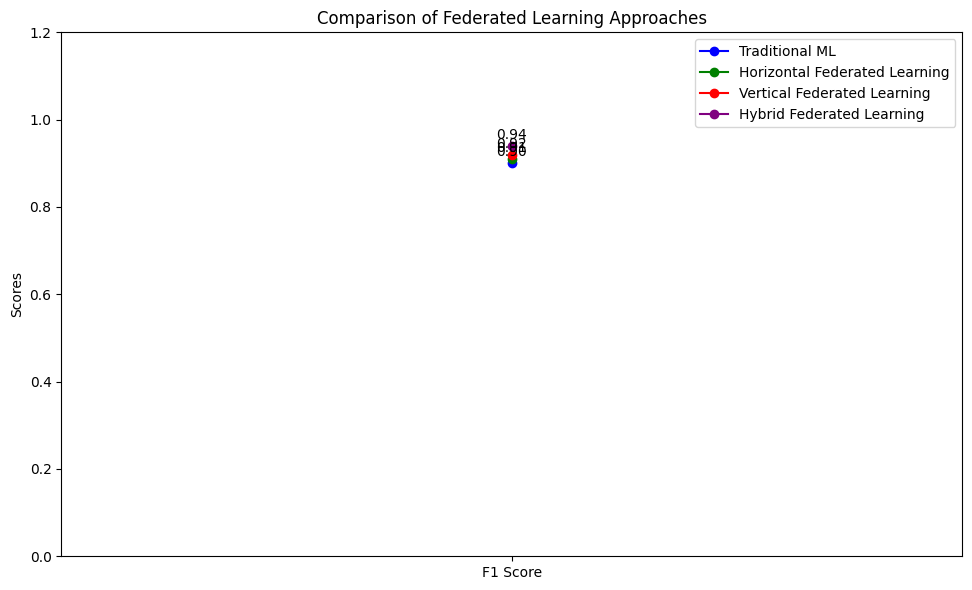

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have metrics for all three methods
metrics_ml = {'F1 Score': 0.90}
metrics_hfl = {'F1 Score': 0.91}
metrics_vfl = {'F1 Score': 0.92}
metrics_hybrid = {'F1 Score': 0.94}

# Extract metrics for line plotting
labels = ['F1 Score']
ml_scores = [metrics_ml['F1 Score']]
hfl_scores = [metrics_hfl['F1 Score']]
vfl_scores = [metrics_vfl['F1 Score']]
hybrid_scores = [metrics_hybrid['F1 Score']]

# Create x-axis values
x = np.arange(len(labels))  # the label locations

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for each method
ax.plot(x, ml_scores, marker='o', label='Traditional ML', linestyle='-', color='blue')
ax.plot(x, hfl_scores, marker='o', label='Horizontal Federated Learning', linestyle='-', color='green')
ax.plot(x, vfl_scores, marker='o', label='Vertical Federated Learning', linestyle='-', color='red')
ax.plot(x, hybrid_scores, marker='o', label='Hybrid Federated Learning', linestyle='-', color='purple')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Federated Learning Approaches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate points with their values
def annotate_points(x, y, label):
    for i, value in enumerate(y):
        ax.annotate(f'{value:.2f}', xy=(x[i], y[i]), xytext=(0, 5), textcoords="offset points", ha='center')

annotate_points(x, ml_scores, 'Traditional ML')
annotate_points(x, hfl_scores, 'Horizontal Federated Learning')
annotate_points(x, vfl_scores, 'Vertical Federated Learning')
annotate_points(x, hybrid_scores, 'Hybrid Federated Learning')

# Adjust layout to avoid overlap
fig.tight_layout()

# Set y-axis limit
plt.ylim(0, 1.2)

# Show plot
plt.show()


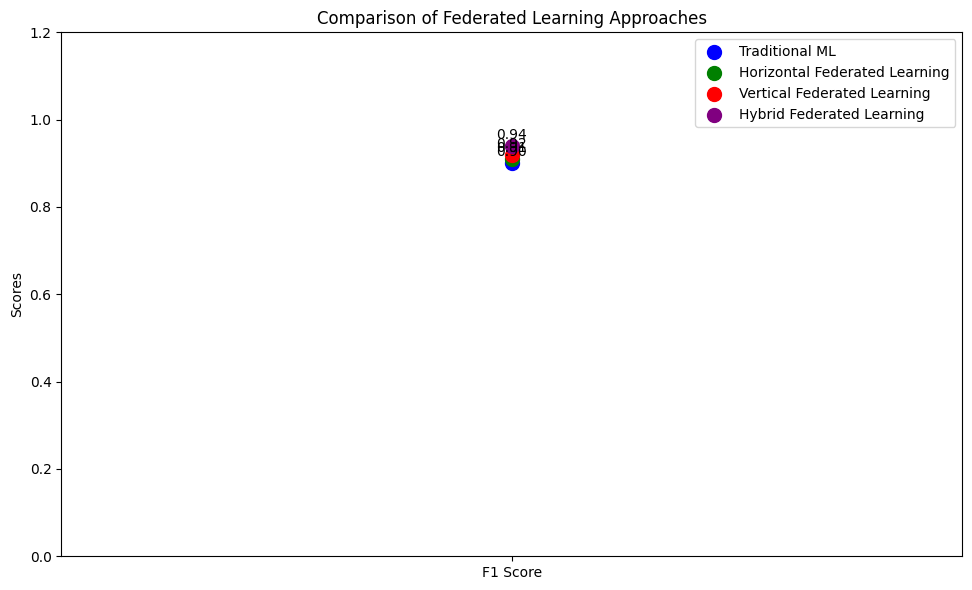

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have metrics for all three methods
metrics_ml = {'F1 Score': 0.90}
metrics_hfl = {'F1 Score': 0.91}
metrics_vfl = {'F1 Score': 0.92}
metrics_hybrid = {'F1 Score': 0.94}

# Extract metrics for dot plotting
labels = ['F1 Score']
ml_scores = [metrics_ml['F1 Score']]
hfl_scores = [metrics_hfl['F1 Score']]
vfl_scores = [metrics_vfl['F1 Score']]
hybrid_scores = [metrics_hybrid['F1 Score']]

# Create x-axis values
x = np.arange(len(labels))  # the label locations

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot dots for each method
ax.scatter(x, ml_scores, label='Traditional ML', color='blue', s=100)
ax.scatter(x, hfl_scores, label='Horizontal Federated Learning', color='green', s=100)
ax.scatter(x, vfl_scores, label='Vertical Federated Learning', color='red', s=100)
ax.scatter(x, hybrid_scores, label='Hybrid Federated Learning', color='purple', s=100)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Federated Learning Approaches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate points with their values
def annotate_points(x, y, label):
    for i, value in enumerate(y):
        ax.annotate(f'{value:.2f}', xy=(x[i], y[i]), xytext=(0, 5), textcoords="offset points", ha='center')

annotate_points(x, ml_scores, 'Traditional ML')
annotate_points(x, hfl_scores, 'Horizontal Federated Learning')
annotate_points(x, vfl_scores, 'Vertical Federated Learning')
annotate_points(x, hybrid_scores, 'Hybrid Federated Learning')

# Adjust layout to avoid overlap
fig.tight_layout()

# Set y-axis limit
plt.ylim(0, 1.2)

# Show plot
plt.show()
